# Day 3 作業

## [作業目標]:
熟悉對 HSV 的操作、Histogram equalization,以及二值化的使用。

## [作業重點]:
1. 將 RGB 轉換為 HSV,分別印出 Hue, Saturation, Value
2. 對 Value 進行 Histogram Equalization,並印出處理結果(處理完的圖
片和處理完的 Value)
3. 將 RGB 轉換為 Gray level,再進行單值二值化及自適應二值化



## 解題步驟

1. 將 RGB 轉換為 HSV，分別印出 Hue, Saturation, Value
2. 對 Value 進行 Histogram Equalization，並印出處理結果(處理完的圖片和處理完的 Value)
3. 將 RGB 轉換為 Gray level，再進行單值二值化及自適應二值化



## 先讀取並顯示圖片

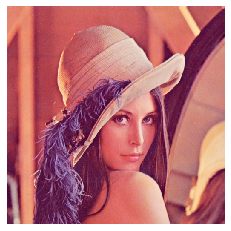

In [23]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt

img_color = cv2.imread('./image/lena.png')

# cv2 預設 color space 是 BGR，但 matplotlib，顯示是以 RGB 來顯示，故需要做順序的調整
plt.imshow(img_color[:, :, [2, 1, 0]])
plt.axis('off')
plt.show()

## 1. 將 RGB 轉換為 HSV，分別印出 Hue, Saturation, Value

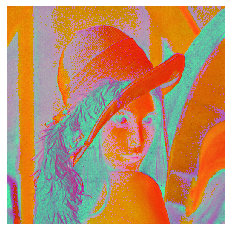

In [27]:
 
""" Your Code Here: 讀取 lena.png 並使用 matplotlib 顯示 """
# 將 RGB 轉換為 HSV
img_hsv = cv2.cvtColor(img_color, cv2.COLOR_BGR2HSV)
plt.imshow(img_hsv[:, :, [2, 1, 0]])
plt.axis('off')
plt.show()



In [28]:

# 分別印出 Hue, Saturation, Value
title = ['Hue', 'Saturation', 'Value']
print( img_hsv )

[[[  4 114 226]
  [  4 114 226]
  [  1 103 223]
  ...
  [  7 120 230]
  [  5 128 221]
  [  2 140 200]]

 [[  4 114 226]
  [  4 114 226]
  [  1 103 223]
  ...
  [  7 120 230]
  [  5 128 221]
  [  2 140 200]]

 [[  4 114 226]
  [  4 114 226]
  [  1 103 223]
  ...
  [  7 120 230]
  [  5 128 221]
  [  2 140 200]]

 ...

 [[161 200  84]
  [161 200  84]
  [166 180  92]
  ...
  [177 147 173]
  [178 154 172]
  [176 166 177]]

 [[163 187  82]
  [163 187  82]
  [166 170  96]
  ...
  [178 155 179]
  [177 155 181]
  [178 153 185]]

 [[163 187  82]
  [163 187  82]
  [166 170  96]
  ...
  [178 155 179]
  [177 155 181]
  [178 153 185]]]


## 2. 對 Value 進行 Histogram Equalization，並印出處理結果(處理完的圖片和處理完的 Value)

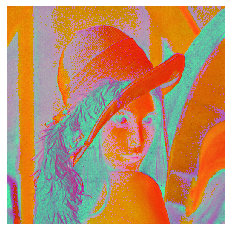

[[[  4 114 226]
  [  4 114 226]
  [  1 103 223]
  ...
  [  7 120 230]
  [  5 128 221]
  [  2 140 200]]

 [[  4 114 226]
  [  4 114 226]
  [  1 103 223]
  ...
  [  7 120 230]
  [  5 128 221]
  [  2 140 200]]

 [[  4 114 226]
  [  4 114 226]
  [  1 103 223]
  ...
  [  7 120 230]
  [  5 128 221]
  [  2 140 200]]

 ...

 [[161 200  84]
  [161 200  84]
  [166 180  92]
  ...
  [177 147 173]
  [178 154 172]
  [176 166 177]]

 [[163 187  82]
  [163 187  82]
  [166 170  96]
  ...
  [178 155 179]
  [177 155 181]
  [178 153 185]]

 [[163 187  82]
  [163 187  82]
  [166 170  96]
  ...
  [178 155 179]
  [177 155 181]
  [178 153 185]]]


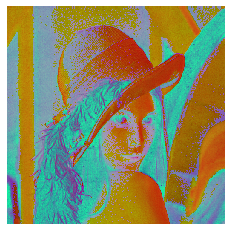

[[[  4 114 175]
  [  4 114 175]
  [  1 103 172]
  ...
  [  7 120 179]
  [  5 128 170]
  [  2 140 149]]

 [[  4 114 175]
  [  4 114 175]
  [  1 103 172]
  ...
  [  7 120 179]
  [  5 128 170]
  [  2 140 149]]

 [[  4 114 175]
  [  4 114 175]
  [  1 103 172]
  ...
  [  7 120 179]
  [  5 128 170]
  [  2 140 149]]

 ...

 [[161 200  33]
  [161 200  33]
  [166 180  41]
  ...
  [177 147 122]
  [178 154 121]
  [176 166 126]]

 [[163 187  31]
  [163 187  31]
  [166 170  45]
  ...
  [178 155 128]
  [177 155 130]
  [178 153 134]]

 [[163 187  31]
  [163 187  31]
  [166 170  45]
  ...
  [178 155 128]
  [177 155 130]
  [178 153 134]]]


In [33]:
# 先印出 HE(直方圖均衡 (Histogram Equalization)) 前的圖片與 value
plt.imshow(img_hsv[:, :, [2, 1, 0]])
plt.axis('off')
plt.show()

print( img_hsv )


# 印出 HE(直方圖均衡 (Histogram Equalization))  後的圖片與 value
change_percentage = 0.2
img_hls_down = img_hsv.astype('float32')
img_hls_down[..., -1] = img_hls_down[..., -1]/255 - change_percentage
img_hls_down[img_hls_down[..., -1] < 0] = 0
img_hls_down[..., -1] = img_hls_down[..., -1]*255
img_hls_down = img_hls_down.astype('uint8')


plt.imshow(img_hls_down[:, :, [2, 1, 0]])
plt.axis('off')
plt.show()

print( img_hls_down )



## 3. 將 RGB 轉換為 Gray level，再進行單值二值化及自適應二值化

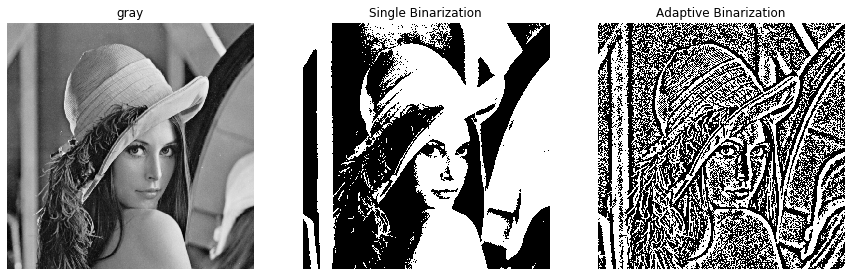

In [18]:
# 將圖片轉換為灰階圖片
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

# Single Binarization
ret, thrsh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

plt.figure(figsize = (15, 5))

plt.subplot(1, 3, 1, title = 'gray')
plt.imshow(img_gray, cmap = 'gray')
plt.axis('off')

plt.subplot(1, 3, 2, title = 'Single Binarization')
plt.imshow(thrsh, cmap = 'gray')
plt.axis('off')


# Adaptive Binarization
dst = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 0)
plt.subplot(1, 3, 3, title = 'Adaptive Binarization')
plt.imshow(dst, cmap = 'gray')
plt.axis('off')

plt.show()